In [263]:
!pip install fredapi

# you can get you API key here:

https://fred.stlouisfed.org/docs/api/fred/

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key ='your api key here'

# Create the Fred Object

In [265]:
fred = Fred(api_key=fred_key)

# Search for economic data

In [266]:
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-04-14,2023-04-14,S&P 500,2013-04-15,2023-04-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-13 19:10:48-05:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-04-14,2023-04-14,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-04-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-14 08:36:04-05:00,56,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-04-14,2023-04-14,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,36,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-04-14,2023-04-14,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-03-30 10:39:01-05:00,91,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-04-14,2023-04-14,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-03-30 10:39:01-05:00,81,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POPTTLJPA148NRUG,POPTTLJPA148NRUG,2023-04-14,2023-04-14,Population for Japan,1950-01-01,2019-01-01,Annual,A,Millions of Persons,Mil. of Persons,Not Seasonally Adjusted,NSA,2021-01-21 13:29:49-06:00,4,Source ID: pop When using these data in your ...
GCT1502RI,GCT1502RI,2023-04-14,2023-04-14,Bachelor's Degree or Higher for Rhode Island,2006-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-09-15 11:00:24-05:00,4,Estimate of educational attainment for populat...
PLGDPOPKA670NRUG,PLGDPOPKA670NRUG,2023-04-14,2023-04-14,Price level of Output-side Real GDP at Current...,1950-01-01,2019-01-01,Annual,A,Price Level of USA Output-side GDP in 2017=1,Price Level of USA Output-side GDP in 2017=1,Not Seasonally Adjusted,NSA,2021-11-08 13:31:34-06:00,4,Source ID: pl_gdpo When using these data in y...


In [267]:
sp_search = fred.search('S&P',order_by='popularity')

In [268]:
sp_search.shape

(1000, 15)

In [269]:
sp_search.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-04-14,2023-04-14,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-04-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-14 08:51:05-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-04-14,2023-04-14,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-03-30 10:39:01-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-04-14,2023-04-14,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-04-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-14 08:51:09-05:00,84,This data represents the effective yield of th...
SP500,SP500,2023-04-14,2023-04-14,S&P 500,2013-04-15,2023-04-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-13 19:10:48-05:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-04-14,2023-04-14,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-03-30 10:39:01-05:00,81,"For more information regarding the index, plea..."
MEHOINUSA672N,MEHOINUSA672N,2023-04-14,2023-04-14,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...
BAMLC0A0CM,BAMLC0A0CM,2023-04-14,2023-04-14,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2023-04-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-14 08:57:02-05:00,80,The ICE BofA Option-Adjusted Spreads (OASs) ar...
DJIA,DJIA,2023-04-14,2023-04-14,Dow Jones Industrial Average,2013-04-15,2023-04-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-13 19:01:03-05:00,73,The observations for the Dow Jones Industrial ...
SPCS20RSA,SPCS20RSA,2023-04-14,2023-04-14,S&P/Case-Shiller 20-City Composite Home Price ...,2000-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-03-30 10:39:03-05:00,70,"For more information regarding the index, plea..."


# Pull Raw Data and Plot

In [270]:
sp500 = fred.get_series(series_id='SP500')

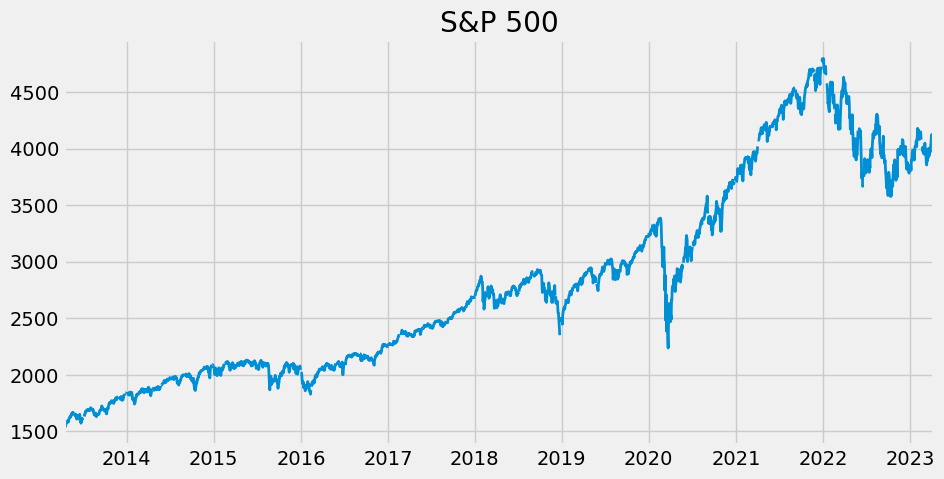

In [271]:
sp500.plot(figsize=(10,5),title='S&P 500',lw=2);

# Pull and Joing Multiple Data Series

In [272]:
unemp_result = fred.search('unemployment')

In [273]:
unrate = fred.get_series('UNRATE')

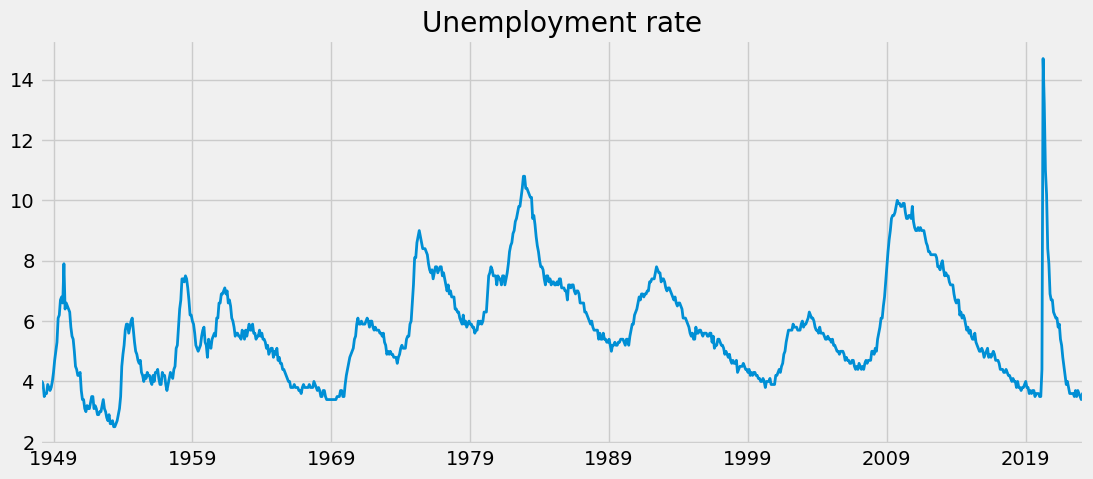

In [274]:
unrate.plot(figsize=(12,5),title='Unemployment rate',lw=2);

In [275]:
unemp_result

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-14,2023-04-14,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-04-14,2023-04-14,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:02-05:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-04-14,2023-04-14,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-04-14,2023-04-14,Continued Claims (Insured Unemployment),1967-01-07,2023-04-01,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-04-13 07:48:05-05:00,74,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-04-14,2023-04-14,Unemployment Level,1948-01-01,2023-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-04-07 07:44:04-05:00,70,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUMT064014000000003A,LAUMT064014000000003A,2023-04-14,2023-04-14,Unemployment Rate in Riverside-San Bernardino-...,1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:48:54-05:00,1,None
LNU04000025,LNU04000025,2023-04-14,2023-04-14,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:46-05:00,1,The series comes from the 'Current Population ...
BAKE506UR,BAKE506UR,2023-04-14,2023-04-14,"Unemployment Rate in Bakersfield, CA (MSA)",1990-01-01,2023-02-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-04-05 13:32:15-05:00,1,None


In [276]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [277]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-14,2023-04-14,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-04-14,2023-04-14,Unemployment Rate - Black or African American,1972-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:12-05:00,68,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-04-14,2023-04-14,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,56,Series Is Presented Here As Three Variables--(...
CAUR,CAUR,2023-04-14,2023-04-14,Unemployment Rate in California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,58,None
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-04-14,2023-04-14,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,25,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000089,LNS14000089,2023-04-14,2023-04-14,Unemployment Rate - 25-34 Yrs.,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:57-05:00,6,The series comes from the 'Current Population ...
CSOUUR,CSOUUR,2023-04-14,2023-04-14,Unemployment Rate in South Census Region,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:07-05:00,7,None
LNS14000150,LNS14000150,2023-04-14,2023-04-14,Unemployment Rate - Married Men,1955-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:44-05:00,6,The series comes from the 'Current Population ...


In [278]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'CAUR', 'M0892BUSM156SNBR',
       'TXUR', 'LNS14000002', 'U2RATE', 'NYUR', 'FLUR', 'LNS14000031',
       'LNS14000024', 'LNS14000009', 'LNS14027662', 'LNS14000001',
       'LNS14000003', 'LNS14027660', 'LRUN64TTUSM156S', 'OHUR', 'PAUR', 'ALUR',
       'MIUR', 'ILUR', 'MNUR', 'NCUR', 'MAUR', 'WIUR', 'TNUR', 'NJUR', 'KYUR',
       'COUR', 'GAUR', 'VAUR', 'AKUR', 'NMUR', 'LNS14032183', 'ORUR', 'SCUR',
       'AZUR', 'WAUR', 'MOUR', 'IAUR', 'NDUR', 'WVUR', 'OKUR', 'LNS14027659',
       'INUR', 'ARUR', 'LAUR', 'NVUR', 'HIUR', 'LNS14000012', 'LNS14024887',
       'LASMT261982000000003', 'UTUR', 'MDUR', 'CTUR', 'KSUR', 'MEUR', 'WYUR',
       'NEUR', 'SDUR', 'PRUR', 'MSUR', 'DCUR', 'MTUR', 'IDUR', 'LNS14000032',
       'NHUR', 'LNS14000060', 'RIUR', 'DEUR', 'LRUNTTTTUSM156S',
       'LASMT391746000000003', 'LNS14000018', 'LNS14000028', 'LRHUTTTTUSM156S',
       'VTUR', 'LNS14000036', 'CNERUR', 'LNS14000029', 'LRUN24TTUSM156S',
       'CMWRUR

In [279]:
len(unemp_df.index)

96

In [297]:
unemp_df_list_of_columns = unemp_df.index.tolist()
print(unemp_df_list_of_columns)

['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'CAUR', 'M0892BUSM156SNBR', 'TXUR', 'LNS14000002', 'U2RATE', 'NYUR', 'FLUR', 'LNS14000031', 'LNS14000024', 'LNS14000009', 'LNS14027662', 'LNS14000001', 'LNS14000003', 'LNS14027660', 'LRUN64TTUSM156S', 'OHUR', 'PAUR', 'ALUR', 'MIUR', 'ILUR', 'MNUR', 'NCUR', 'MAUR', 'WIUR', 'TNUR', 'NJUR', 'KYUR', 'COUR', 'GAUR', 'VAUR', 'AKUR', 'NMUR', 'LNS14032183', 'ORUR', 'SCUR', 'AZUR', 'WAUR', 'MOUR', 'IAUR', 'NDUR', 'WVUR', 'OKUR', 'LNS14027659', 'INUR', 'ARUR', 'LAUR', 'NVUR', 'HIUR', 'LNS14000012', 'LNS14024887', 'LASMT261982000000003', 'UTUR', 'MDUR', 'CTUR', 'KSUR', 'MEUR', 'WYUR', 'NEUR', 'SDUR', 'PRUR', 'MSUR', 'DCUR', 'MTUR', 'IDUR', 'LNS14000032', 'NHUR', 'LNS14000060', 'RIUR', 'DEUR', 'LRUNTTTTUSM156S', 'LASMT391746000000003', 'LNS14000018', 'LNS14000028', 'LRHUTTTTUSM156S', 'VTUR', 'LNS14000036', 'CNERUR', 'LNS14000029', 'LRUN24TTUSM156S', 'CMWRUR', 'LNS14000315', 'LNS14000025', 'LNS14027689', 'LNS14000026', 'CWSTUR', 'LNS14024230', 'LNS14200

In [300]:
list_to_drop = [elem for elem in unemp_df_list_of_columns if len(elem) > 4]

In [301]:
#This cell usually takes long to run, it will clean the dataframe and come up with a new one with only the states meta data

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
#Drop all the columns not corresponding to states in this line
unemp_states = pd.concat(all_results, axis=1).drop(list_to_drop, axis=1)

In [302]:
unemp_states

,CAUR,TXUR,NYUR,FLUR,OHUR,PAUR,ALUR,MIUR,ILUR,MNUR,NCUR,MAUR,WIUR,TNUR,NJUR,KYUR,COUR,GAUR,VAUR,AKUR,NMUR,ORUR,SCUR,AZUR,WAUR,MOUR,IAUR,NDUR,WVUR,OKUR,INUR,ARUR,LAUR,NVUR,HIUR,UTUR,MDUR,CTUR,KSUR,MEUR,WYUR,NEUR,SDUR,PRUR,MSUR,DCUR,MTUR,IDUR,NHUR,RIUR,DEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,4.1,3.8,4.1,2.7,4.1,4.4,2.6,4.4,4.6,3.0,3.9,3.7,3.0,3.5,3.3,3.9,2.8,3.1,3.2,3.7,3.5,4.8,3.3,4.0,4.6,2.7,3.1,2.1,4.1,3.2,3.2,3.5,3.6,5.5,3.7,2.4,3.1,4.0,2.9,3.1,3.9,2.7,2.2,6.0,4.1,4.2,2.7,2.8,2.9,3.3,4.7,3.1
2022-12-01,4.1,3.8,4.1,2.7,4.1,4.3,2.6,4.3,4.6,2.9,3.8,3.7,3.0,3.5,3.3,3.9,2.8,3.1,3.1,3.7,3.5,4.8,3.3,4.0,4.5,2.7,3.0,2.1,4.1,3.2,3.1,3.4,3.5,5.5,3.7,2.4,3.0,4.0,2.9,3.1,3.9,2.7,2.2,6.0,4.0,4.2,2.6,2.8,2.9,3.2,4.6,3.0
2023-01-01,4.2,3.9,4.2,2.6,4.0,4.3,2.6,4.3,4.5,2.9,3.8,3.5,2.9,3.5,3.4,3.9,2.8,3.1,3.2,3.8,3.5,4.8,3.2,3.8,4.6,2.7,3.0,2.1,3.9,3.1,3.1,3.4,3.5,5.5,3.6,2.4,3.0,3.9,2.9,2.9,3.9,2.5,2.1,6.0,3.9,4.5,2.5,2.7,2.8,3.1,4.6,2.9
2023-02-01,4.3,4.0,4.2,2.6,3.9,4.4,2.5,4.3,4.5,3.0,3.6,3.7,2.7,3.5,3.5,3.9,2.9,3.1,3.2,3.8,3.6,4.7,3.2,3.7,4.6,2.6,2.9,2.1,3.7,3.0,3.1,3.2,3.6,5.5,3.6,2.4,2.9,4.0,2.9,2.8,3.8,2.3,2.1,6.0,3.7,4.7,2.4,2.6,2.7,3.1,4.6,2.8


In [303]:
unemp_states.isna().sum(axis=1)

1929-04-01    52
1929-05-01    52
1929-06-01    52
1929-07-01    52
1929-08-01    52
              ..
2022-11-01     0
2022-12-01     0
2023-01-01     0
2023-02-01     0
2023-03-01    52
Length: 1116, dtype: int64

<AxesSubplot:>

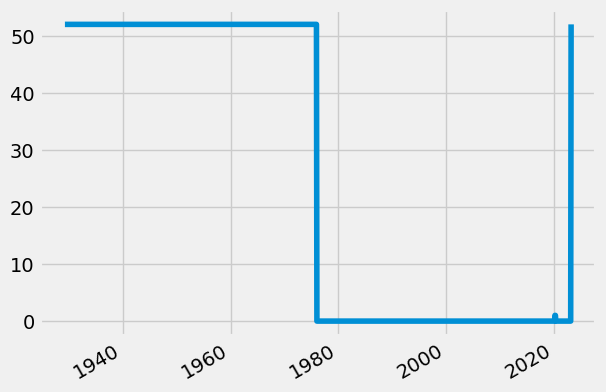

In [304]:
unemp_states.isna().sum(axis=1).plot()

In [305]:
unemp_states = unemp_states.dropna()

In [306]:
unemp_df['title']=='Unemployment Rate in California'

series id
UNRATE              False
LNS14000006         False
M0892AUSM156SNBR    False
CAUR                 True
M0892BUSM156SNBR    False
                    ...  
LNS14000089         False
CSOUUR              False
LNS14000150         False
LNS14000093         False
USAURAMS            False
Name: title, Length: 96, dtype: bool

In [307]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').str.strip().to_dict()
unemp_states.columns = unemp_states.columns.str.strip()
unemp_states.columns = [id_to_state[c] if c in id_to_state else c for c in unemp_states.columns]
unemp_states = unemp_states.loc[:, ~unemp_states.columns.duplicated()]

In [308]:
print(len(id_to_state))

96


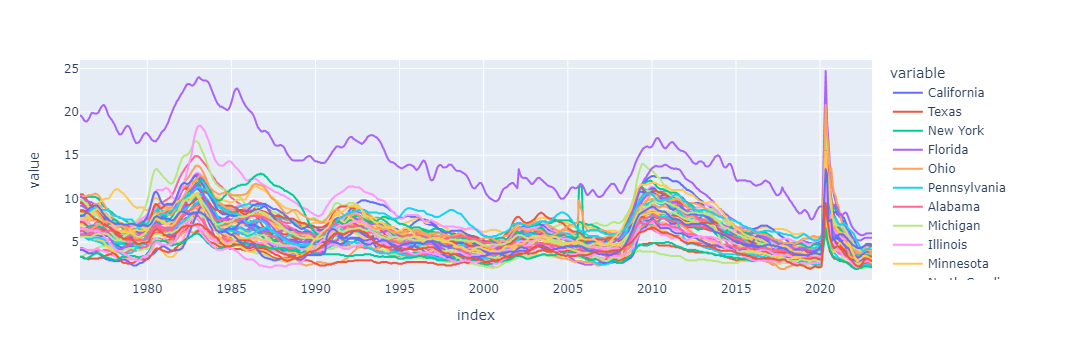

In [309]:
# plot States Unemployment Rate
px.line(unemp_states)

## Pull May 2020 Unemployment Rate Per State

In [310]:
print(unemp_states.loc[unemp_states.index == '2020-05-01'].T)

                          2020-05-01
California                      15.7
Texas                           11.6
New York                        16.6
Florida                         14.1
Ohio                            12.7
Pennsylvania                    12.9
Alabama                         10.4
Michigan                        19.1
Illinois                        14.7
Minnesota                       11.1
North Carolina                  11.6
Massachusetts                   15.5
Wisconsin                       10.5
Tennessee                       12.1
New Jersey                      15.3
Kentucky                        12.8
Colorado                        11.6
Georgia                          9.7
Virginia                        10.0
Alaska                          11.9
New Mexico                       9.3
Oregon                          11.8
South Carolina                   9.2
Arizona                         11.2
Washington                      13.2
Missouri                         9.5
I

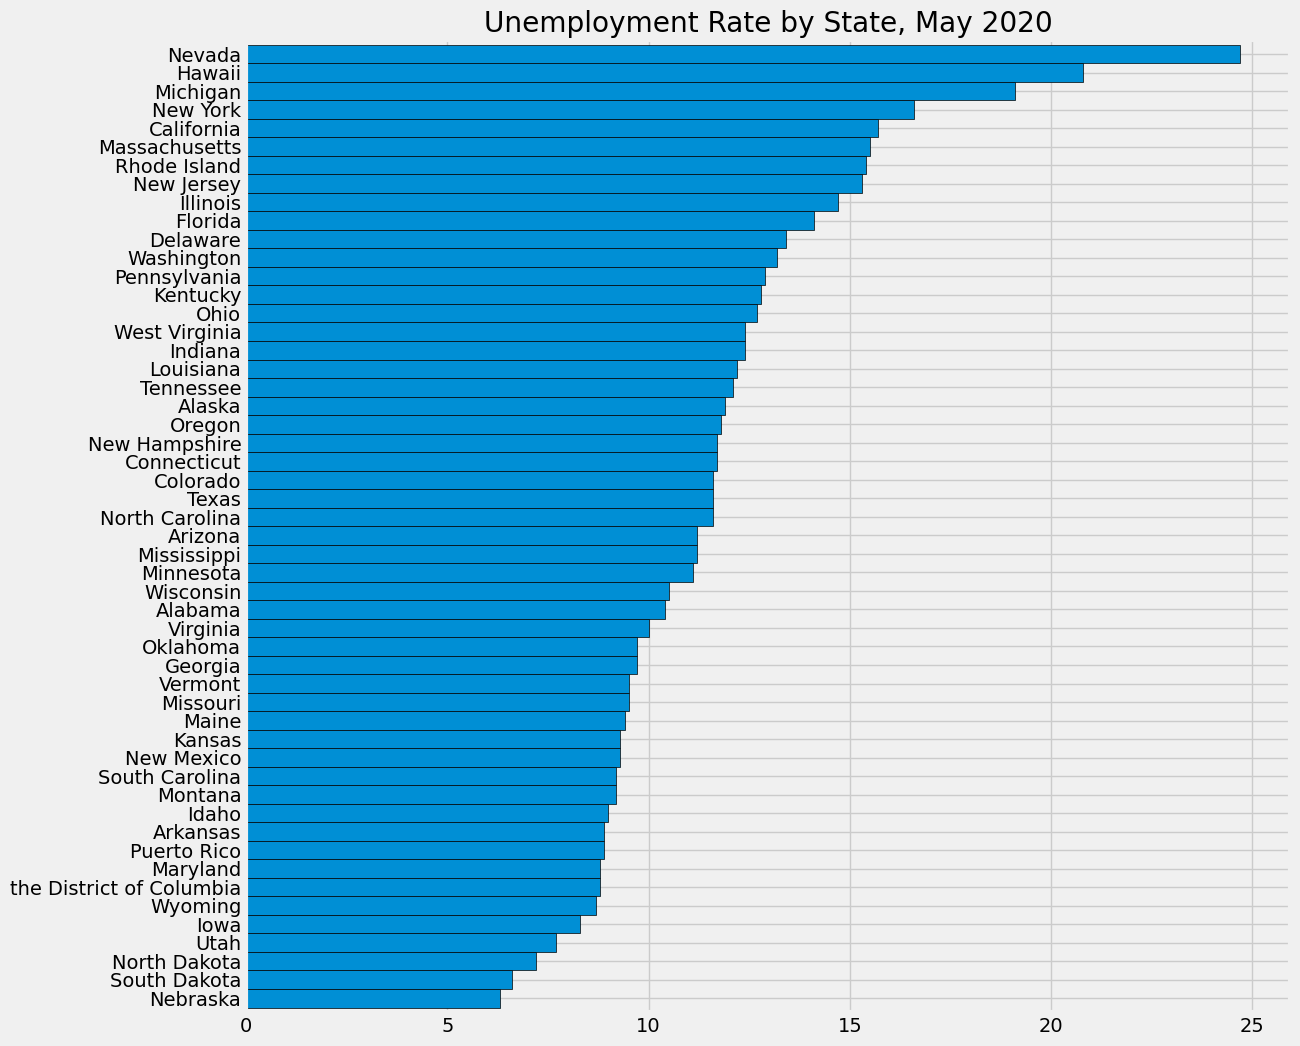

In [311]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh',figsize=(12,12), width=1, edgecolor='black',
                                                                                      title='Unemployment Rate by State, May 2020');
ax.legend().remove()
plt.show()

In [177]:
#print(unemp_states.loc[unemp_states.index].T)

# Pull Participation Rate

In [312]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [313]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [314]:
to_drop = {key: value for key, value in part_id_to_state.items() if not key.startswith("LBS")}
to_drop_list = list(to_drop.keys())
print(to_drop_list)

['CIVPART', 'LNS11300060', 'LNS11300002', 'LNS11300001', 'LNS11324230', 'LNS11300012', 'LNS11300006', 'LRAC25MAUSM156S', 'LNS11300036', 'LNS11327662', 'LNS11300028', 'LRAC25FEUSM156S', 'LNS11300031', 'LNS11327660', 'LNS11300009', 'LNS11300032', 'LNS11300003', 'LNS11300025', 'LNS11300026', 'LRAC64TTUSM156S', 'LRAC55TTUSM156S', 'LNS11327659', 'LNS11300029', 'LRIN64TTUSM156S', 'LNS11327689', 'LNS11300018', 'LRIN25MAUSM156S', 'LNS11300015', 'LRAC25TTUSM156S', 'LRIN64MAUSM156S', 'LRAC24TTUSM156S', 'LRAC55MAUSM156S', 'LRAC24MAUSM156S', 'LRAC24FEUSM156S', 'LRAC55FEUSM156S', 'LRACTTTTUSM156S', 'LRIN55MAUSM156S', 'LRIN24MAUSM156S', 'LRIN25FEUSM156S', 'LRAC74MAUSM156S', 'LRIN24FEUSM156S', 'LRIN55FEUSM156S', 'LRIN74FEUSM156S', 'LRIN74MAUSM156S', 'LRAC64FEUSM156S', 'LRAC64MAUSM156S', 'LRIN64FEUSM156S', 'LRAC74FEUSM156S', 'LRIN25TTUSM156S', 'LRAC74TTUSM156S', 'LRIN55TTUSM156S', 'LRIN74TTUSM156S', 'LRIN24TTUSM156S', 'LRACTTFEUSM156S', 'LRACTTMAUSM156S', 'LRINTTMAUSM156S', 'LRINTTFEUSM156S', 'LRINTTT

In [315]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1).drop(to_drop_list, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [333]:
part_states = part_states.dropna()

# Plot Unumployment vs Participation

In [373]:
# Fix DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District of Columbia'})

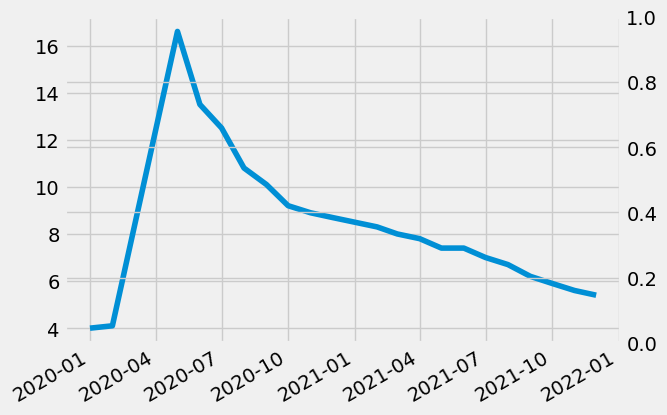

In [374]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment');
#part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation', color=color_pal[1]);

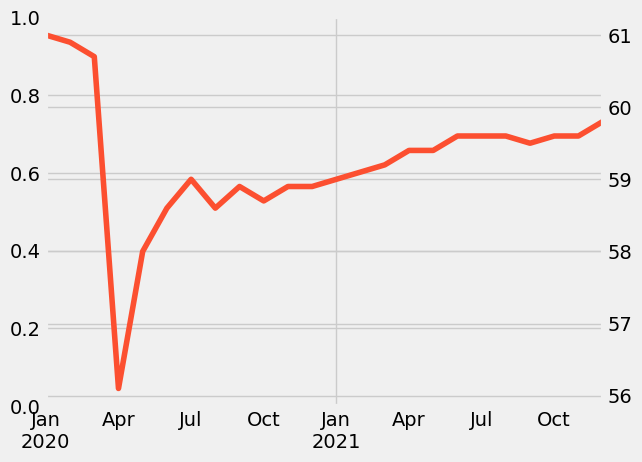

In [375]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
#unemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment');
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation', color=color_pal[1]);

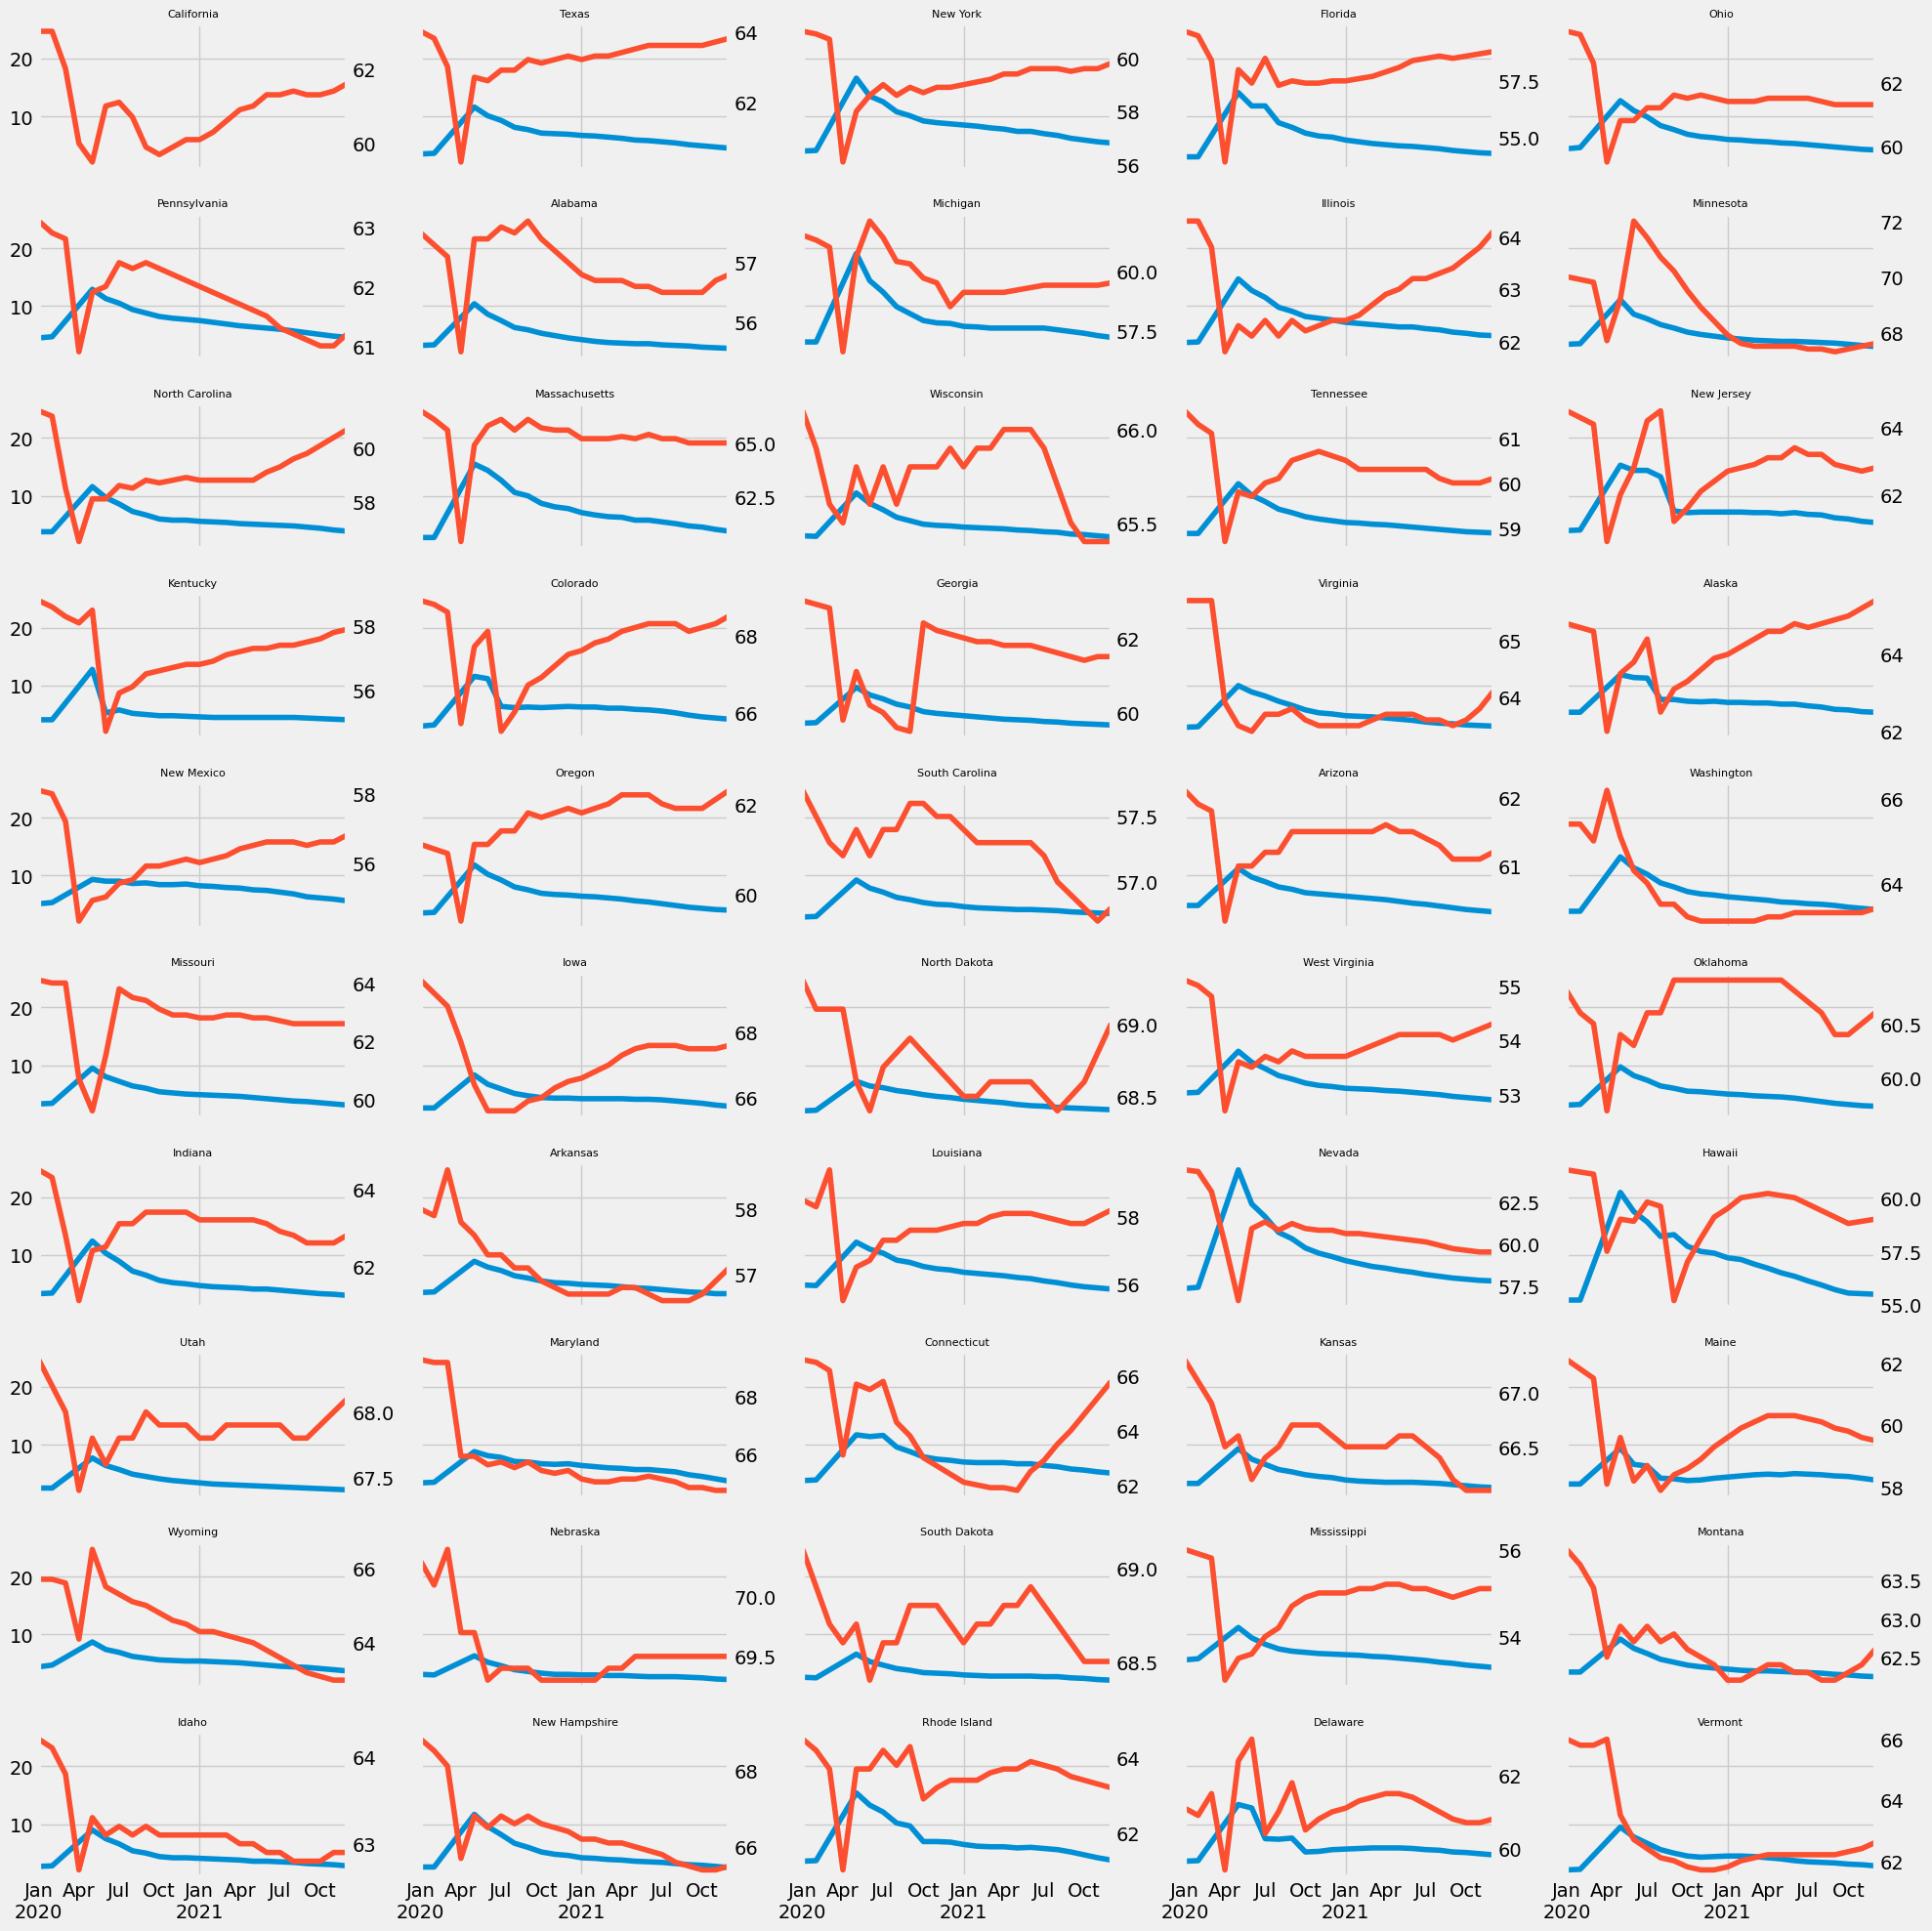

In [387]:
fig, axs = plt.subplots(10, 5, figsize=(20,20), sharex=True, sharey=True)
axs = axs.flatten()

i=0
for state in unemp_states.columns:
    if state in ['District of Columbia', 'Puerto Rico']:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment');
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1]);
    ax2.grid(False)
    axs[i].set_title(state, fontsize=8)
    i+= 1
plt.tight_layout()
plt.show()

In [350]:
# Merge the two DataFrames column-wise
merged_df = pd.concat([part_states, unemp_states], axis=1, keys=['participation', 'unemployment'])

# Print the first 5 rows of the merged DataFrame
#print(merged_df.head())

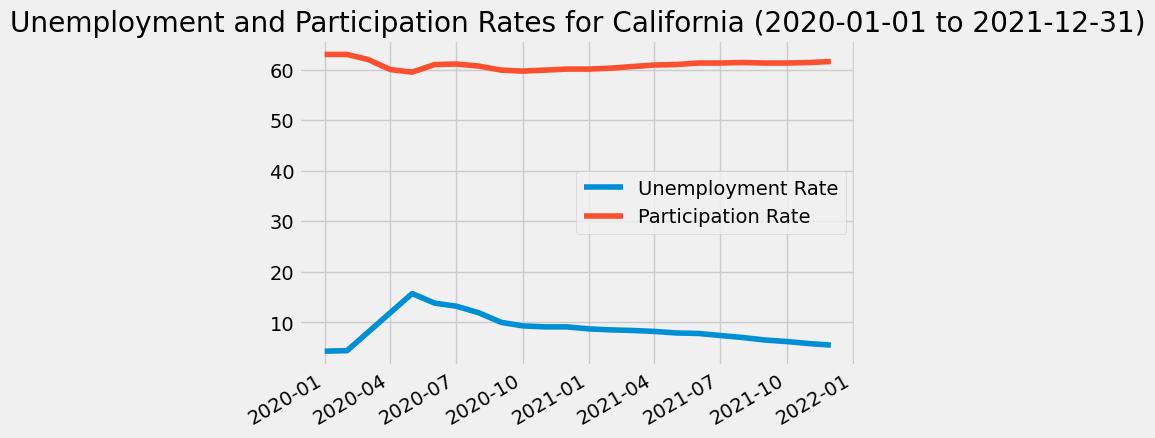

In [353]:
state = 'California'
start_date = '2020-01-01'
end_date = '2021-12-31'

unemp_states.loc[start_date:end_date, state].plot(label='Unemployment Rate')
part_states.loc[start_date:end_date, state].plot(label='Participation Rate')
plt.title(f'Unemployment and Participation Rates for {state} ({start_date} to {end_date})')
plt.legend()
plt.show()

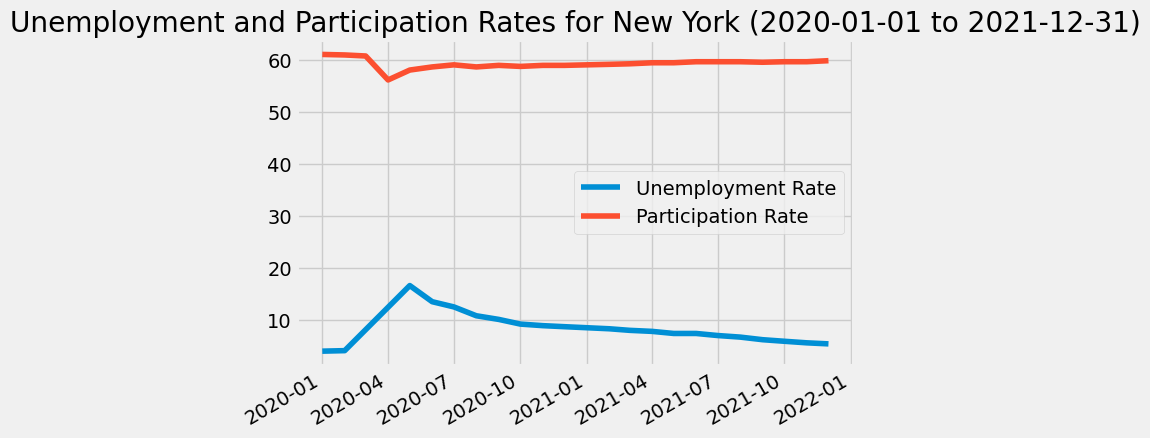

In [352]:
state = 'New York'
start_date = '2020-01-01'
end_date = '2021-12-31'

unemp_states.loc[start_date:end_date, state].plot(label='Unemployment Rate')
part_states.loc[start_date:end_date, state].plot(label='Participation Rate')
plt.title(f'Unemployment and Participation Rates for {state} ({start_date} to {end_date})')
plt.legend()
plt.show()